<a href="https://colab.research.google.com/github/Onkar-Shukla/DemoRepo/blob/main/Level3Task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TensorFlow version: 2.19.0
Keras version: 3.10.0

Loading MNIST dataset...
11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Original training data shape: (60000, 28, 28), labels shape: (60000,)
Original test data shape: (10000, 28, 28), labels shape: (10000,)
Flattened training data shape: (60000, 784)
Flattened test data shape: (10000, 784)
One-hot encoded training labels shape: (60000, 10)
One-hot encoded test labels shape: (10000, 10)

Defining neural network architecture...


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)


Compiling the model...

Training the model...
Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7524 - loss: 0.8070 - val_accuracy: 0.9592 - val_loss: 0.1446
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9324 - loss: 0.2222 - val_accuracy: 0.9688 - val_loss: 0.1020
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9526 - loss: 0.1616 - val_accuracy: 0.9755 - val_loss: 0.0875
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9618 - loss: 0.1281 - val_accuracy: 0.9775 - val_loss: 0.0843
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9662 - loss: 0.1058 - val_accuracy: 0.9775 - val_loss: 0.0744
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9717 - loss: 0.0917 - val_accuracy: 0.9798 - val_loss: 0.0687
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9753 - loss: 0.0818 - val_accuracy: 0.9787 - val_loss: 0.0705
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - acc

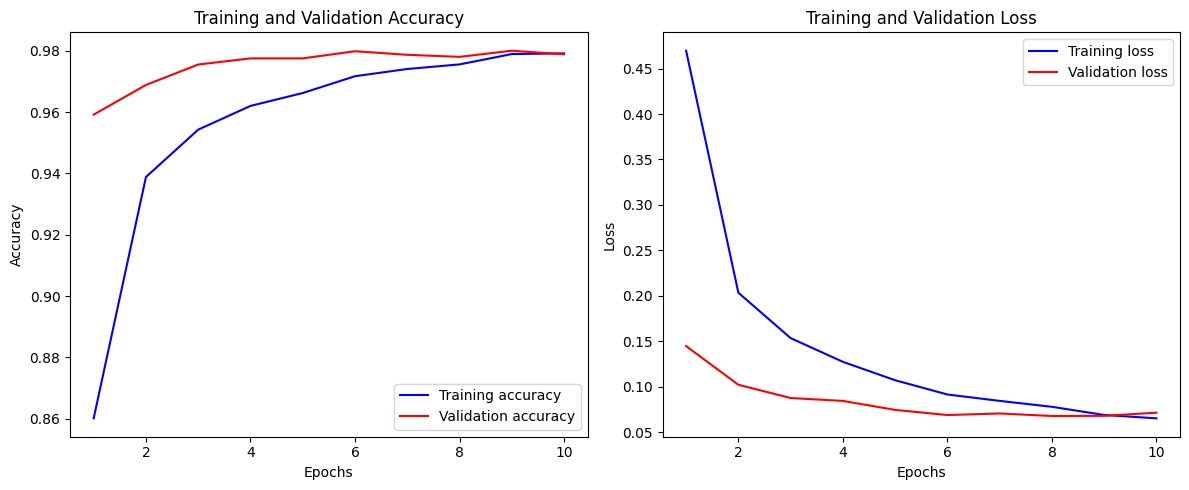

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

print("TensorFlow version:", tf.__version__)
print("Keras version:", keras.__version__)

# 1. Load the MNIST dataset
print("\nLoading MNIST dataset...")
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

print(f"Original training data shape: {x_train.shape}, labels shape: {y_train.shape}")
print(f"Original test data shape: {x_test.shape}, labels shape: {y_test.shape}")

# 2. Preprocess the image data
# Normalize pixel values to 0-1
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Reshape images to be flattened vectors (28*28 = 784)
x_train_flat = x_train.reshape((x_train.shape[0], -1))
x_test_flat = x_test.reshape((x_test.shape[0], -1))

print(f"Flattened training data shape: {x_train_flat.shape}")
print(f"Flattened test data shape: {x_test_flat.shape}")

# Convert target labels to one-hot encoded format (10 classes for MNIST)
y_train_one_hot = keras.utils.to_categorical(y_train, num_classes=10)
y_test_one_hot = keras.utils.to_categorical(y_test, num_classes=10)

print(f"One-hot encoded training labels shape: {y_train_one_hot.shape}")
print(f"One-hot encoded test labels shape: {y_test_one_hot.shape}")

# 3. Define the architecture of a feed-forward neural network
print("\nDefining neural network architecture...")
model = keras.Sequential([
    keras.Input(shape=(784,)),  # Input layer, 784 features
    layers.Dense(128, activation="relu", name="hidden_layer_1"), # Hidden layer with 128 units, ReLU activation
    layers.Dropout(0.2), # Dropout for regularization
    layers.Dense(64, activation="relu", name="hidden_layer_2"),  # Another hidden layer
    layers.Dropout(0.2), # Dropout for regularization
    layers.Dense(10, activation="softmax", name="output_layer") # Output layer with 10 units (for 10 classes), softmax activation
])

model.summary()

# 4. Compile the model
print("\nCompiling the model...")
model.compile(
    optimizer="adam", # Adam optimizer
    loss="categorical_crossentropy", # Loss function for one-hot encoded labels
    metrics=["accuracy"]
)

# 5. Train the compiled model
print("\nTraining the model...")
history = model.fit(
    x_train_flat, y_train_one_hot,
    epochs=10, # Number of epochs
    batch_size=128, # Batch size
    validation_split=0.1 # Use a portion of training data for validation
)

# 6. Evaluate the trained model's performance on the test set
print("\nEvaluating the model on test data...")
test_loss, test_accuracy = model.evaluate(x_test_flat, y_test_one_hot, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# 7. Extract the training history
# Get training and validation loss and accuracy from the history object
hist_df = tf.data.Dataset.from_tensor_slices(history.history)
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(loss) + 1)

# 8. Plot the training and validation accuracy over epochs
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# 9. Plot the training and validation loss over epochs
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

## Summary:

### Q&A

**1. What is the final performance of the neural network model?**
The final model achieved a Test Loss of 0.0705 and a Test Accuracy of 0.9790 on the MNIST dataset.

**2. What were the key observations from the training process?**
During the 10 epochs of training, both training and validation accuracy steadily increased, while training and validation loss consistently decreased. The validation metrics remained close to the training metrics, suggesting effective learning without significant overfitting within the training period.

**3. What insights were gained from the visualizations?**
The visualizations of training and validation accuracy and loss over epochs visually confirmed the model's performance improvement and convergence, showing clear trends of increasing accuracy and decreasing loss for both training and validation sets.

### Data Analysis Key Findings

*   The MNIST dataset was successfully loaded and preprocessed, including normalization of pixel values to 0-1 and reshaping images into flattened vectors of 784 features. Labels were converted to one-hot encoded format.
*   A feed-forward neural network was designed with two hidden `Dense` layers (128 and 64 units, respectively, both with ReLU activation and 0.2 Dropout) and a 10-unit `softmax` output layer, totaling 109,386 trainable parameters.
*   The model, compiled with the `adam` optimizer and `categorical_crossentropy` loss, was trained for 10 epochs with a batch size of 128, achieving strong learning performance.
*   The model demonstrated high accuracy on unseen data, with a Test Accuracy of 0.9790 and a Test Loss of 0.0705.
*   The training and validation curves showed a consistent decrease in loss and an increase in accuracy for both sets over epochs, indicating good learning and generalization without clear signs of overfitting during the observed epochs.

### Insights or Next Steps

*   The model performs exceptionally well on the MNIST dataset, demonstrating that a relatively simple feed-forward neural network with dropout regularization is highly effective for this classification task.
*   Given the high test accuracy and the balanced training/validation curves, further experimentation with increased epochs or slightly more complex architectures could potentially push the accuracy even higher, though marginal gains might be expected.


In [4]:
import pickle

In [5]:
pickle.dump(model, open('model.pkl', 'wb'))

In [6]:
pickle.load(open('model.pkl', 'rb'))

<Sequential name=sequential, built=True>

In [7]:
print("\nMaking predictions on test data...")
predictions = model.predict(x_test_flat)

# Convert predictions to class labels (index of the highest probability)
predicted_classes = np.argmax(predictions, axis=1)

print("\nSample predictions vs. actual labels:")
for i in range(10):
    print(f"Image {i}: Predicted = {predicted_classes[i]}, Actual = {y_test[i]}")

# Calculate accuracy for the predictions (optional, as model.evaluate already does this)
# correct_predictions = np.sum(predicted_classes == y_test)
# total_test_samples = len(y_test)
# prediction_accuracy = correct_predictions / total_test_samples
# print(f"Prediction Accuracy: {prediction_accuracy:.4f}")


Making predictions on test data...
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

Sample predictions vs. actual labels:
Image 0: Predicted = 7, Actual = 7
Image 1: Predicted = 2, Actual = 2
Image 2: Predicted = 1, Actual = 1
Image 3: Predicted = 0, Actual = 0
Image 4: Predicted = 4, Actual = 4
Image 5: Predicted = 1, Actual = 1
Image 6: Predicted = 4, Actual = 4
Image 7: Predicted = 9, Actual = 9
Image 8: Predicted = 5, Actual = 5
Image 9: Predicted = 9, Actual = 9
